<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,cross_val_score

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
file = '/content/pima-indians-diabetes.csv'
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
df = pd.read_csv(file,names=names)

In [4]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
array = df.values
x=array[:,0:8]; y=array[:,8]

In [6]:
kfold = KFold(n_splits=10,random_state=8,shuffle=True)
cart = DecisionTreeClassifier()
model= AdaBoostClassifier(n_estimators=30,random_state=30)
result = cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7551435406698566


In [7]:
model1= RandomForestClassifier(n_estimators=100,criterion='gini',max_features=3)

In [8]:
result1=cross_val_score(model1,x,y,cv=kfold)

In [9]:
result1.mean()

0.7617395762132604

In [10]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [11]:
file = '/content/pima-indians-diabetes.csv'
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
df = pd.read_csv(file,names=names)
array = df.values
x=array[:,0:8]; y=array[:,8]

In [12]:
kfold = KFold(n_splits=10,random_state=8,shuffle=True)
ensemble = []
model1 = LogisticRegression(max_iter=500)
ensemble.append(('logistic',model1))
model2 = DecisionTreeClassifier()
ensemble.append(('cart',model2))
model3 = SVC()
ensemble.append(('svc',model3))

In [13]:
ensemble = VotingClassifier(ensemble)

In [14]:
results2= cross_val_score(ensemble,x,y,cv=kfold)

In [15]:
results2.mean()

0.7708475734791524

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
file = '/content/pima-indians-diabetes.csv'
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']
df = pd.read_csv(file,names=names)
array = df.values
x=array[:,0:8]; y=array[:,8]

In [18]:
model = KNeighborsClassifier(n_neighbors=17)

In [19]:
results = cross_val_score(model,x,y,cv=kfold)

In [20]:
results.mean()

0.7629015721120984

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
n_neighbors = np.array(range(1,40))

In [23]:
param_grid = dict(n_neighbors=n_neighbors)

In [24]:
modela = KNeighborsClassifier()

In [25]:
paramgrid = GridSearchCV(estimator = modela,param_grid=param_grid)

In [26]:
paramgrid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [27]:
paramgrid.best_score_

0.7578558696205755

In [28]:
paramgrid.best_params_

{'n_neighbors': 14}

In [29]:
k_score =[]
k_range = range(1,41)
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  res = cross_val_score(knn,x,y,cv=5)
  k_score.append(res.mean())

In [30]:
k_score

[0.662821492233257,
 0.6940497411085647,
 0.7135557253204311,
 0.7213564213564213,
 0.723979288685171,
 0.727900857312622,
 0.7357185298361768,
 0.7500381970970207,
 0.7422120363296834,
 0.7448009506833035,
 0.748731007554537,
 0.7526355996944233,
 0.7552584670231729,
 0.7578558696205755,
 0.7383668618962738,
 0.7435277141159494,
 0.7513708513708514,
 0.748756472285884,
 0.7500806383159324,
 0.7487734487734488,
 0.7435786435786437,
 0.7461420932009167,
 0.7435362023597317,
 0.7435362023597317,
 0.737034207622443,
 0.7409303115185468,
 0.7409472880061115,
 0.7383074441897971,
 0.7421950598421188,
 0.7461166284695697,
 0.7447924624395212,
 0.7461081402257873,
 0.746125116713352,
 0.7474323062558357,
 0.7487140310669722,
 0.7474238180120534,
 0.743519225872167,
 0.739597657244716,
 0.7448179271708684,
 0.7369917664035311]

In [31]:
import matplotlib.pyplot as plt


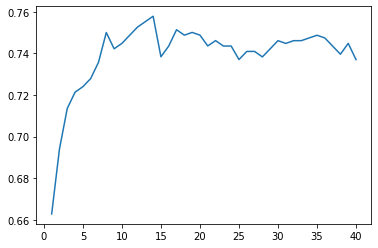

In [32]:
plt.plot(k_range,k_score)